In [508]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [509]:
X = pd.read_csv('datasets/question-2-features.csv')
Y = pd.read_csv('datasets/question-2-labels.csv')

In [510]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [511]:
Y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [512]:
from numpy.linalg import matrix_rank
matrix_rank(np.dot(X.transpose(), X))

13

In [513]:
np.dot(X.transpose(),X).shape

(13, 13)

### Matrix X is full rank(rank is equal to the size of its rows), thus invertible

### If a matrix is not full rank, it is not invertible. Rank represents the number of linearly independent rows or columns in the matrix

## Calculating for only LSTAT

In [514]:
X_lstat = X['LSTAT']

In [515]:
X_lstat = np.c_[np.ones(( X_lstat.shape[0] ,1)), X_lstat] # add x0 = 1 to each instance, BIAS TERM

In [516]:
X_lstat

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

In [517]:
beta_lstat = np.linalg.inv(np.dot(X_lstat.transpose(),X_lstat)).dot(X_lstat.transpose()).dot(Y)

In [518]:
beta_lstat

array([[34.55384088],
       [-0.95004935]])

### wo = 34.55384088, w1 = -0.95004935

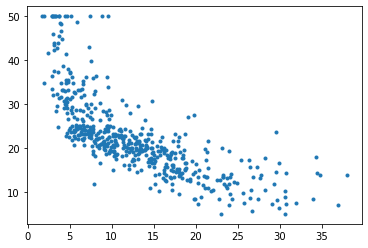

In [519]:
plt.plot(X['LSTAT'],Y,'.')
plt.show()

In [571]:
x = np.linspace(0,40,40)

In [572]:
y_pred = beta_lstat[0] + beta_lstat[1] * x

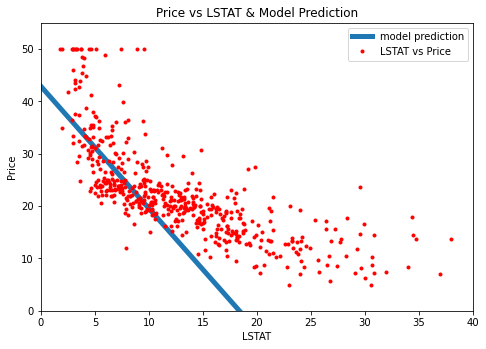

In [573]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y_pred, label="model prediction", lw=5)
ax.plot(X['LSTAT'],Y,'r.',label="LSTAT vs Price")
plt.xlim([0,40])
plt.ylim([0,55])
ax.set_title('Price vs LSTAT & Model Prediction')
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')
ax.legend()
plt.show()

### Out feature does not seem linear, linear regression gives some hint about the distrubition of data but it does not seem enough to explain completely. -log(x) would be a better and MSE error would be smaller

In [552]:
def MSE(ground_truth, prediction):
    summation = 0  # variable to store the summation of differences
    n = len(prediction) # finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
        difference = ground_truth[i] - prediction[i]  #finding the difference between observed and predicted value
        squared_difference = difference ** 2  #taking square of the differene 
        summation = summation + squared_difference  #taking a sum of all the differences
    return summation / n  #dividing summation by total values to obtain average

In [574]:
# Mean Squared Error
MSE = np.square(np.subtract(Y.values[0:40],y_pred)).mean()
MSE

1367.9540283279348

# Polynomial Regression

In [525]:
X_lstat = X['LSTAT'].to_numpy()
X_lstat = np.expand_dims(X_lstat, axis=1)
# Add a bias factor to X.
X_lstat = np.hstack((np.ones((X_lstat.shape[0], 1)), X_lstat))
X_lstat = np.hstack((
    X_lstat,
    (X_lstat[:, 1] ** 2).reshape((X_lstat.shape[0], 1))
))
X_lstat

array([[ 1.    ,  4.98  , 24.8004],
       [ 1.    ,  9.14  , 83.5396],
       [ 1.    ,  4.03  , 16.2409],
       ...,
       [ 1.    ,  5.64  , 31.8096],
       [ 1.    ,  6.48  , 41.9904],
       [ 1.    ,  7.88  , 62.0944]])

In [558]:
print('coefficients')
beta_lstat = np.linalg.inv(np.dot(X_lstat.transpose(),X_lstat)).dot(X_lstat.transpose()).dot(Y)
beta_lstat

coefficients


array([[42.86200733],
       [-2.3328211 ],
       [ 0.04354689]])

In [568]:
x = np.linspace(0,40,40)
y_pred_p = beta_lstat[0] + beta_lstat[1] * x + beta_lstat[2] * pow(x,2)

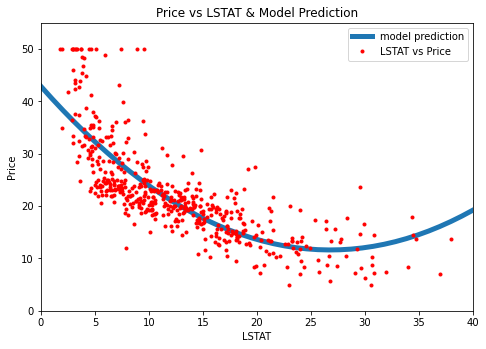

In [569]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y_pred_p, label="model prediction", lw=5)
ax.plot(X['LSTAT'],Y,'r.',label="LSTAT vs Price")
plt.xlim([0,40])
plt.ylim([0,55])
ax.set_title('Price vs LSTAT & Model Prediction')
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')
ax.legend()
plt.show()

In [570]:
# Mean Squared Error
MSE = np.square(np.subtract(Y.values[0:40],y_pred_p)).mean()
MSE

114.56144938973152

### Our graph becomes polynomial and fits to the data better as we can see from the plot, our MSE decreases significanly when we go from linear regression to polynomial regression. Since model fits to the data better